In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("SalesData.csv")

### 1. Compare Sales by region for 2016 with 2015 using bar chart

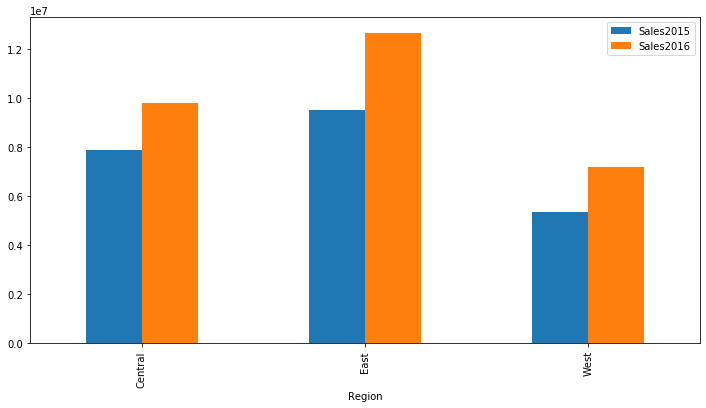

In [3]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)
sales1 = sales.groupby(['Region']).aggregate({'Sales2015':'sum','Sales2016':'sum'})

sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

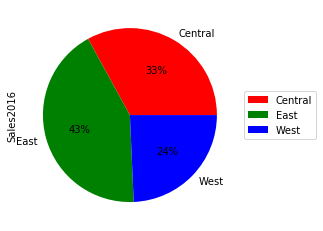

In [4]:
sales2 = sales.groupby(['Region']).aggregate({'Sales2016':'sum'})

sales2.plot(kind='pie', 
            labels=list(sales2.index), 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

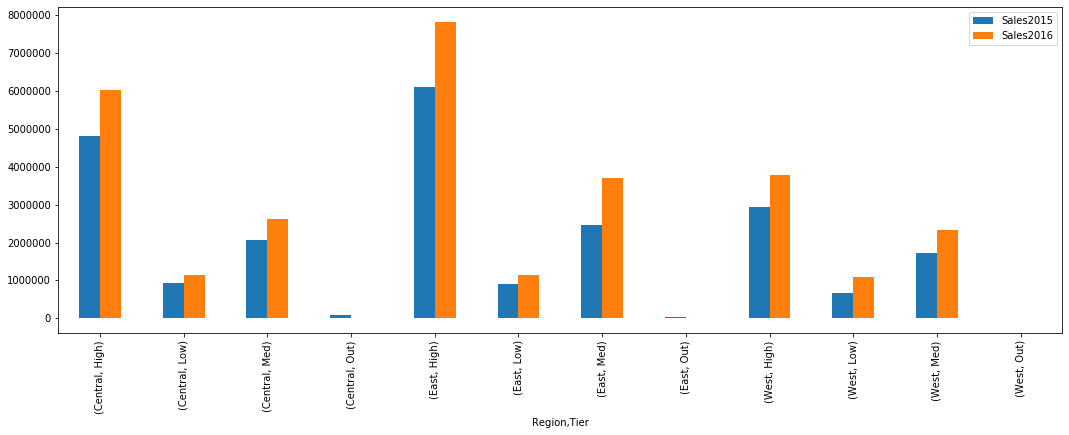

In [5]:
sales3 = sales.groupby(['Region','Tier']).aggregate({'Sales2015':'sum','Sales2016':'sum'})

sales3graph=sales3.plot.bar(figsize=(18,6))


### 4. In East region, which state registered a decline in 2016 as compared to 2015?

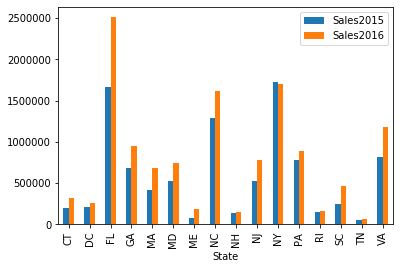

In [6]:
sales[sales.Region == 'East'].groupby(by='State').sum()[['Sales2015','Sales2016']].plot(kind = 'bar')

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

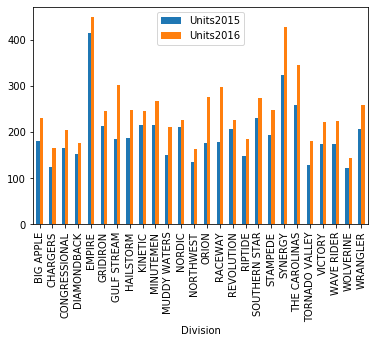

In [7]:
sales[sales.Tier=='High'].groupby(by='Division').sum()[['Units2015','Units2016']].plot(kind='bar')

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [8]:
from numpy import where as IF
sales['Qtr'] = IF(sales.Month.isin(['Jan','Feb','Mar']),'Q1',
                 IF(sales.Month.isin(['Apr','May','Jun']),'Q2',
                    IF(sales.Month.isin(['Jul','Aug','Sep']),'Q3','Q4')))

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


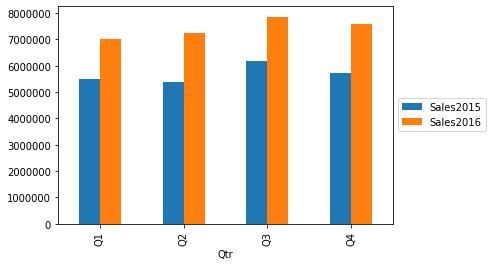

In [9]:
sales.groupby(by='Qtr')[['Sales2015','Sales2016']].sum().plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1,.5))
plt.show()


### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [12]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = sales[sales['Tier']!='Out'] 
sales8 = sales8.groupby(['Qtr','Tier']).aggregate({'Sales2016':'sum'})
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0


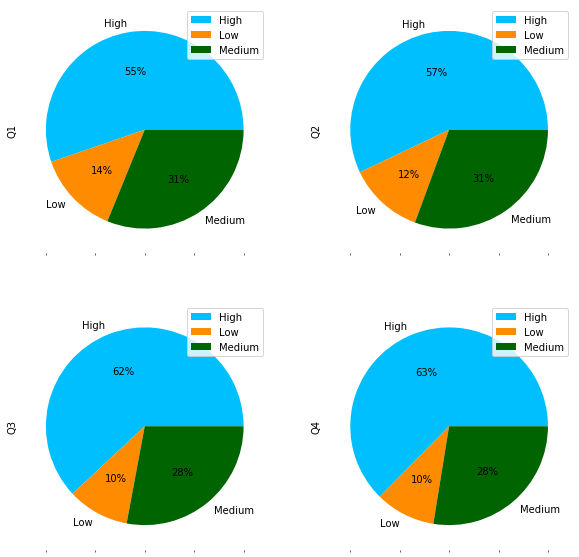

In [13]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()